# Vibration libre d'un treillis

**Marc BUFFAT, Département mécanique UCB Lyon 1**

<img src="treillisfig1.png" />

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
from IPython.core.display import HTML
from IPython.display import display,Image
from matplotlib import animation
#from JSAnimation import IPython_display
#css_file = 'style.css'
#HTML(open(css_file, "r").read())

## Vibrations d'un système a 1ddl
$$ M \ddot{u} + K u = f(t)$$

- étude en fréquence $f(t)=F \sin{\omega t} $

- solution $u(t) = U \sin{\omega t}$

$$ U = \frac{F}{K -\omega^2 M} $$

raisonnance pour $\omega = \sqrt{K/M} $

- dans ce cas la solution s'écrit

$$ u(t)=-\frac{F}{2\omega} t \cos{\omega t} $$

## Modes de vibration libre
- Modèle analytique $u(x,t)$

$$\rho S \frac{\partial^2 u}{\partial t^2} - E S \frac{\partial^2 u}{\partial x^2} = 0$$

- Modèle discret: vecteur $U(t)$

$$ M \frac{ d^2 U }{dt^2 }  + K U = 0$$

- modes propres de pulsation 

$$ U =  \cos{\omega t} \;\Lambda $$

- problème aux valeurs propres généralisées $\omega=\sqrt{\lambda}$

$$ \lambda M \Lambda =  K \Lambda $$

matrice dimension $2Nn \times 2Nn $ , donc $2Nn$ valeurs propres

**attention** élimination des modes rigides (associés au CL en déplacement)

## Matrice élémentaire de rigidité
$$ Ke = \frac{E S }{L} 
\left[\begin{array}{cc}
1 & -1 \\
-1 & 1 \\
\end{array}\right]
$$

## Matrice élementaire de Masse

- formulation EF P1
$$ Me = \frac{\rho S L }{6} 
\left[\begin{array}{cc}
2 & 1 \\
1 & 2 \\
\end{array}\right]
$$

- avec condensation de masse
$$ Me = \frac{\rho S L }{2} 
\left[\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}\right]
$$

## Equations Elements finis
- La formulation EF conduit à un système différentielle
$$ M \ddot{U} + K U = 0$$

### Cas d'une barre encastrée en $x=0$

avec un seul élèment $P^1$ à 2 ddl $U=\{u_1,u_2\}$

$$u_h(x,t) = u_1(t) \Phi_1(x) + u_2(t) \Phi_2(x) $$

- La condition aux limites impose $u_1=0$, donc  un seul ddl $u_2$ 

$$u_h(x,t) = u_2(t) \Phi_2(x) $$

- Equation différentielle ordinaire

$$\frac{\rho S L }{3} \ddot{u}_2 + \frac{E S}{L} u_2 = 0 $$

- Solution sinusoidale $u_2=\cos{\omega_1 t}$

$$ \omega_1 = \sqrt{3} \; \sqrt{\frac{E S}{\rho S L^2}} \mbox{ ou } \omega_1 = \sqrt{2} \; \sqrt{\frac{E S}{\rho S L^2}}$$

- mode discret

$$ u_1(x,t) = \frac{x}{L} cos(\sqrt{3} \; \sqrt{\frac{E S}{\rho S L^2}} t )$$


## Modele analytique ( 1 barre)

$$\rho S \frac{\partial^2 u}{\partial t^2} - E S \frac{\partial^2 u}{\partial x^2} = 0

soit

$$\frac{\partial^2 u}{\partial t^2} - c^2 \frac{\partial^2 u}{\partial x^2} = 0$$

avec $c = \sqrt{\frac{E S}{\rho S}}$ et les conditions aux limites
$u_{(x=0)}=0$ et ${\frac{\partial u}{\partial x}}_{(x=L)}= 0 $

- solution variables séparées $ u(x,t)= X(x)*Y(t) $

$$ c^{2}\frac{\ddot{X}}{X} = \frac{\ddot{Y}}{Y} = \omega^2$$

 avec les conditions aux limites  
 
 $$\omega_k = (2k+1)\frac{\pi}{2L} c $$
 
 - kième mode propre
 
 $$u^k (x,t) = sin((2k+1) \frac{\pi x}{2 L }) cos((2k+1)\frac{\pi}{2}\sqrt{\frac{E S}{\rho S L^2}} t)$$
 
 - premier mode de vibration
 
 $$ u^1 (x,t) = sin(\frac{\pi x}{2 L }) cos(\frac{\pi}{2}\sqrt{\frac{E S}{\rho S L^2}} t)$$

## Simulation numérique: mode discret  
###    treillis 1 barre encastré 1ddl  

- solution du problème aux valeurs propres généralisées

$$ A \Lambda = \lambda B \Lambda $$

- avec

$$ A = M =
\left[\begin{array}{cccc}
1 & 0 &  0 & 0\\
0 & 1 &  0 & 0\\
0 & 0 & \frac{\rho S L }{3} & 0\\
0 & 0 &  0 & 1\\
\end{array}\right]
\mbox{ et }
B = K =
\left[\begin{array}{cccc}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & \frac{E S}{L} & 0\\
0 & 0 & 0 & 1\\
\end{array}\right]
\;\;
$$

In [7]:
# A.N. resolution 
from scipy.linalg import eig
rho=8000; S=0.05**2; L=1.0; E=2.e08; 
M=np.array([[1,0,0,0],[0,1,0,0],[0,0,rho*S*L/3,0],[0,0,0,1]])
print("M=",M)
K=np.array([[1,0,0,0],[0,1,0,0],[0,0,E*S/L,0],[0,0,0,1]])
print("K=",K)
vp,UP=eig(K,M)
print("vp=",vp) 
print(UP.shape)

M= [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         6.66666667 0.        ]
 [0.         0.         0.         1.        ]]
K= [[1.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 5.e+05 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+00]]
vp= [1.0e+00+0.j 1.0e+00+0.j 7.5e+04+0.j 1.0e+00+0.j]
(4, 4)


In [8]:
# 1 mode de vibration (3ieme)
n1=2
omega =np.sqrt(vp[n1].real)
omega1=np.sqrt(3*E*S/(rho*S*L**2))
omegae=np.pi/2*np.sqrt(E*S/(rho*S*L**2))
print("omega calcul=%g mode 1=%g exacte=%g"%(omega,omega1,omegae))
print("VP=",UP[:,n1])

omega calcul=273.861 mode 1=273.861 exacte=248.365
VP= [0. 0. 1. 0.]


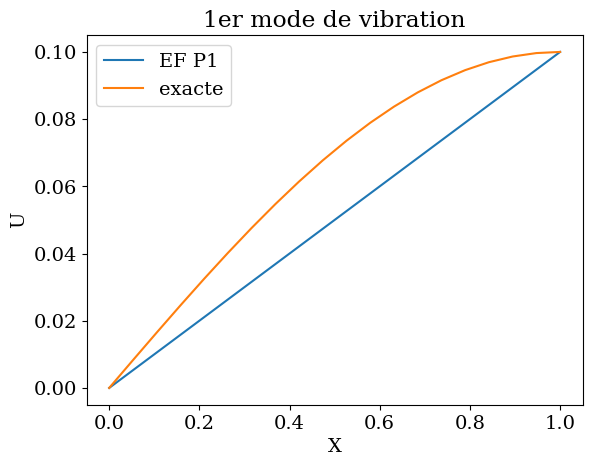

In [9]:
U0 = 0.1
X=np.linspace(0,L,20)
Y=np.sin(np.pi*X/(2*L))
YP1 = UP[2,n1]*X
plt.plot(X,U0*YP1,'-',label='EF P1')
plt.plot(X,U0*Y,'-',label='exacte')
plt.legend(loc=0)
plt.xlabel("X")
plt.ylabel("U")
plt.title("1er mode de vibration");

## vibration de la barre

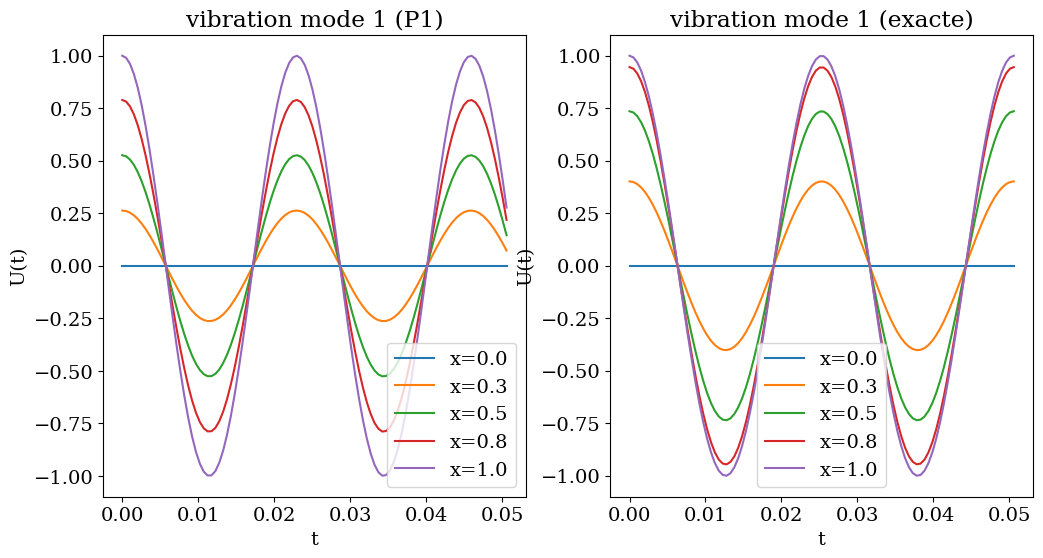

In [11]:
I = [0,5,10,15,19]
T = np.linspace(0,4*np.pi/omegae,100)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i in I:
    U = YP1[i]*np.cos(omega*T)
    plt.plot(T,U,label="x={:.1f}".format(X[i]))
plt.legend()
plt.xlabel("t")
plt.ylabel("U(t)")
plt.title("vibration mode 1 (P1)");
plt.subplot(1,2,2)
for i in I:
    U = Y[i]*np.cos(omegae*T)
    plt.plot(T,U,label="x={:.1f}".format(X[i]))
plt.legend()
plt.xlabel("t")
plt.ylabel("U(t)")
plt.title("vibration mode 1 (exacte)");

## Avec des éléments finis $P^2$

$$
\mathbf{K} = \frac{2ES}{L}\left[\begin{array}{ccc}
+\frac{7}{6} & +\frac{1}{6} & -\frac{4}{3}\\
+\frac{1}{6} & +\frac{7}{6} & -\frac{4}{3}\\
-\frac{4}{3} & -\frac{4}{3} & +\frac{8}{3}
\end{array}\right]
\mbox{ et }
\mathbf{M} = \frac{\rho S L}{2}\left[\begin{array}{ccc}
+\frac{4}{15} & -\frac{1}{15} & +\frac{2}{15}\\
-\frac{1}{15} & +\frac{4}{15} & +\frac{2}{15}\\
+\frac{2}{15} & +\frac{2}{15} & +\frac{16}{15}
\end{array}\right]
$$


In [12]:
M=rho*S*L/30.*np.array([[4.,-1.,2.],[-1.,4.,2.],[2.,2.,16.]])
M[0,:]=0; M[:,0]=0; M[0,0]=1.0
print("M=",M)
K=E*S/L/3.*np.array([[7.,1.,-8.],[1.,7.,-8.],[-8.,-8.,16.]])
K[0,:]=0; K[:,0]=0; K[0,0]=1.0
print("K=",K)
vp,UP=eig(K,M)
print("vp=",vp.real)
print("VP=",UP)

M= [[ 1.          0.          0.        ]
 [ 0.          2.66666667  1.33333333]
 [ 0.          1.33333333 10.66666667]]
K= [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.16666667e+06 -1.33333333e+06]
 [ 0.00000000e+00 -1.33333333e+06  2.66666667e+06]]
vp= [6.21490425e+04 8.04517624e+05 1.00000000e+00]
VP= [[-0.          0.          1.        ]
 [-0.81662373  0.92629644  0.        ]
 [-0.57717041 -0.37679557  0.        ]]


In [13]:
omega =np.sqrt(vp[0].real)
omega1=np.sqrt(3*E*S/(rho*S*L**2))
omegae=np.pi/2*np.sqrt(E*S/(rho*S*L**2))
print(omega,omega1,omegae)
print(UP[:,0])

249.29709681020861 273.8612787525831 248.36470664490255
[-0.         -0.81662373 -0.57717041]


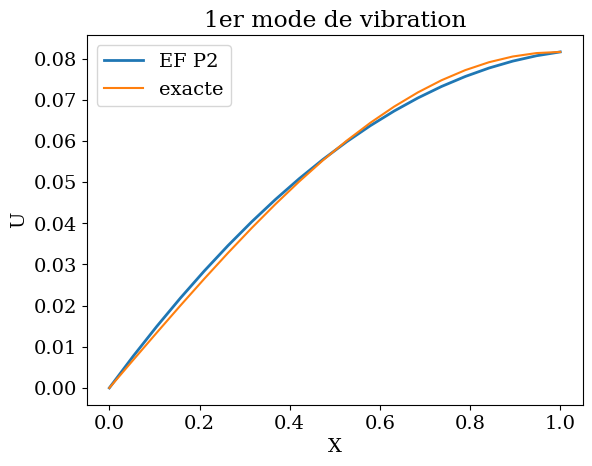

In [14]:
X  =  np.linspace(0,L,20)
Ye = UP[1,0]*np.sin(np.pi*X/(2*L));
Y1 = UP[1,0]*2*X*(X-L/2) + UP[2,0]*4*X*(L-X)
plt.plot(X,-U0*Y1,'-',label='EF P2',lw=2)
plt.plot(X,-U0*Ye,'-',label='exacte')
plt.legend(loc=0)
plt.xlabel("X")
plt.ylabel("U")
plt.title("1er mode de vibration");

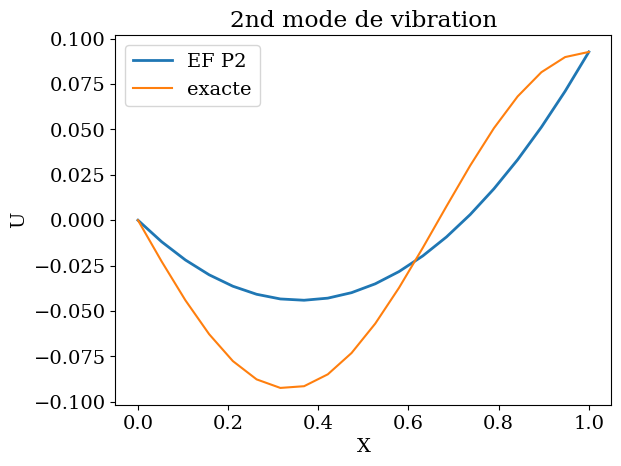

In [15]:
X  =  np.linspace(0,L,20)
Ye = -UP[1,1]*np.sin(3*np.pi*X/(2*L));
Y1 =  UP[1,1]*2*X*(X-L/2) + UP[2,1]*4*X*(L-X)
plt.plot(X,U0*Y1,'-',label='EF P2',lw=2)
plt.plot(X,U0*Ye,'-',label='exacte')
plt.legend(loc=0)
plt.xlabel("X")
plt.ylabel("U")
plt.title("2nd mode de vibration");

## Application à un treillis

# treillis
Treillis nn=6 nbarre=9
Deplacement U=
 [[ 0.00000000e+00  0.00000000e+00]
 [ 5.55555556e-05 -2.81572840e-03]
 [ 2.77777778e-04 -4.79356573e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 6.39648512e-04 -1.46023239e-04]
 [ 9.72981846e-04 -2.81572840e-03]]


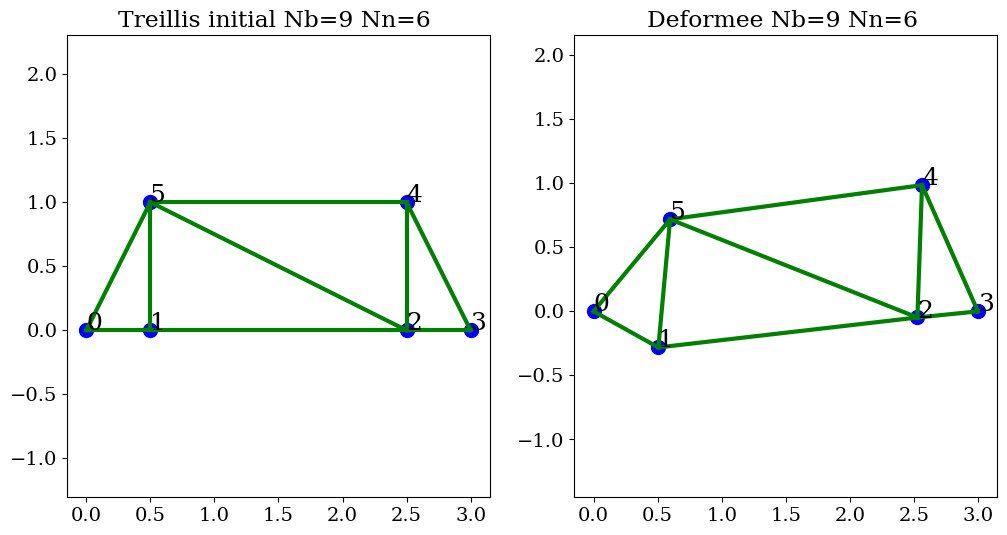

In [16]:
import sys
from scipy import linalg
from Treillis.treillis import *
# resolution du treillis en statique
# ==================================
fichier = "Treillis/mon_treillis1.dat"
# creation du treillis
tr=lecture_treillis(fichier)
tr.E = 200*1.e9
tr.S = 0.000025
tr.rho = 8000
# CL
tr.CL[0]=3
tr.CL[3]=3
tr.FCL[5,:]=[0.,-10000]
# trace du treillis
U = np.zeros((tr.nn,2))
# Assemblage de la matrice
AA=assemblage(tr)
# second membre
BB=np.zeros((2*tr.nn))
# CLimites
A,B=climites(tr,AA,BB)
# solution
U=np.linalg.solve(A,B)
U=U.reshape((tr.nn,2))
print("Deplacement U=\n",U)
# trace de la deformee
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
trace_treillis(tr,"Treillis initial")
plt.subplot(1,2,2)
trace_treillis(tr,"Deformee",U*100)


In [17]:
# en dynamique
AA=assemblage(tr)
# second membre
BB=np.zeros((2*tr.nn))
# CLimites
K,B=climites(tr,AA,BB)
# masse
AA=assemblage_masse(tr)
# second membre
BB=np.zeros((2*tr.nn))
# CLimites
M,B=climites(tr,AA,BB)
#
vp,VP=linalg.eig(K,b=M)
vp=np.real(vp)
ip=np.argsort(vp)
print("IP=",ip)
print("VP=",vp[np.ix_(ip)])
# elimination modes rigides (nbre CL =1,2,3)
nr = np.count_nonzero(tr.CL == 1) + np.count_nonzero(tr.CL == 2) 
nr = nr + 2* np.count_nonzero(tr.CL == 3)
print("Nbre de modes rigides ",nr)
fp=np.sqrt(vp[np.ix_(ip)])/(2*np.pi)
fp=fp[nr:]
print("Frequences propres ",fp)
# tracer 1er mode
mode=nr
print("mode ",mode," f=",fp[mode-nr])
U1=VP[:,ip[mode]]/linalg.norm(VP[:,ip[mode]])
U1=U1.reshape((tr.nn,2))
print(U1)
# 2nd mode
mode=nr+1
print("mode ",mode," f=",fp[mode-nr])
U2=VP[:,ip[mode]]/linalg.norm(VP[:,ip[mode]])
U2=U2.reshape((tr.nn,2))
print(U2)

IP= [ 8  9 10 11  5  7  6  4  3  2  1  0]
VP= [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 4.21279762e+06 8.60886809e+06 1.51199060e+07 3.59907267e+07
 5.64992030e+07 1.14988349e+08 1.80197889e+08 1.91578744e+08]
Nbre de modes rigides  4
Frequences propres  [ 326.66712458  466.97449196  618.86322575  954.80665978 1196.30327744
 1706.66015771 2136.46105817 2202.89497799]
mode  4  f= 326.6671245758102
[[ 0.          0.        ]
 [ 0.02798873 -0.27162259]
 [ 0.11874315  0.05007261]
 [ 0.          0.        ]
 [ 0.69014289  0.17466287]
 [ 0.58296216 -0.24936197]]
mode  5  f= 466.97449195557914
[[ 0.          0.        ]
 [ 0.00407597 -0.35838175]
 [ 0.01467223 -0.63312532]
 [ 0.          0.        ]
 [-0.33725537 -0.51586325]
 [ 0.02472729 -0.30002572]]


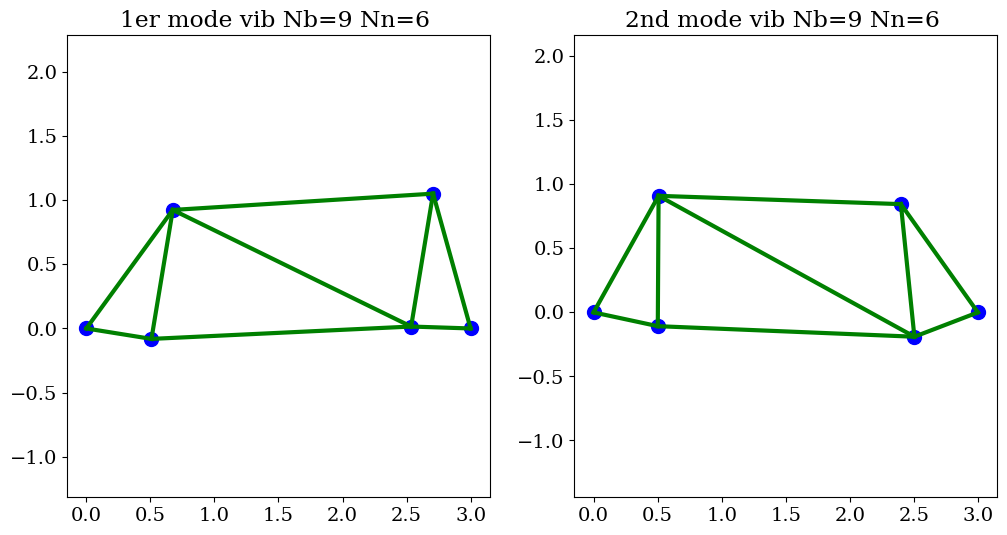

In [18]:
# tracer du mode
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
#trace_treillis(tr,"",U*0.0,False)
trace_treillis(tr,"1er mode vib",U1*0.3,False)
# tracer du mode
plt.subplot(1,2,2)
#trace_treillis(tr,"",U*0.0,False)
trace_treillis(tr,"2nd mode vib",U2*0.3,False)

In [19]:
# animation
from matplotlib import animation
from IPython.core.display import HTML
def anim(mode):
    w = 2*np.pi*fp[mode]
    tt=np.linspace(0,2*np.pi/w,20)
    U1=VP[:,ip[mode]]/linalg.norm(VP[:,ip[mode]])
    U1=U1.reshape((tr.nn,2))
    # tracer
    fig = plt.figure(figsize=(8,4))      
    ax  = plt.axes()
    plt.axis('equal')
    plt.axis('off')
    Xd = tr.X + 0.5*U1
    pts, = ax.plot(Xd[:,0],Xd[:,1],'o',markersize=10,color='b')
    bars = [None]*tr.ne
    for i in range(tr.ne):
        n1=tr.G[i,0]
        n2=tr.G[i,1]
        bars[i],= ax.plot([Xd[n1,0],Xd[n2,0]],[Xd[n1,1],Xd[n2,1]],'-g',lw=3)

    def plot_mode(t):
        U11 = U1*np.cos(w*t)
        Xd = tr.X + 0.5*U11
        pts.set_xdata(Xd[:,0])
        pts.set_ydata(Xd[:,1])
        for i in range(tr.ne):
            n1=tr.G[i,0]
            n2=tr.G[i,1]
            bars[i].set_xdata([Xd[n1,0],Xd[n2,0]])
            bars[i].set_ydata([Xd[n1,1],Xd[n2,1]])
        return
    an=animation.FuncAnimation(fig, plot_mode, frames=tt)
    plt.title("vibration mode {} f={:.0f}hz".format(mode,fp[mode]))
    plt.show()
    return an

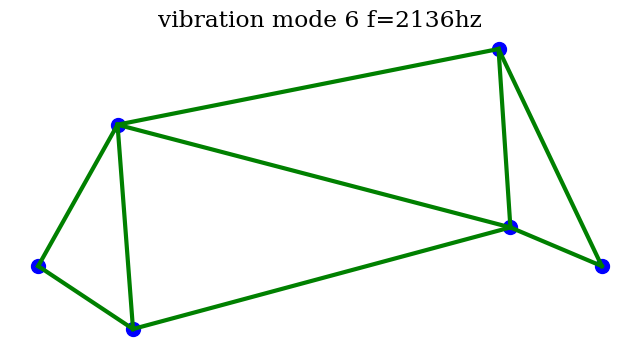

In [20]:
# selection mode
mode=nr+2
an = anim(mode)

In [21]:
HTML(an.to_html5_video())

## FIN